# Task2- Explore the Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the hours they studied. This is a simple linear regression task as it involves just two variable.

Dataset: http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?

# Import packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [7]:
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization

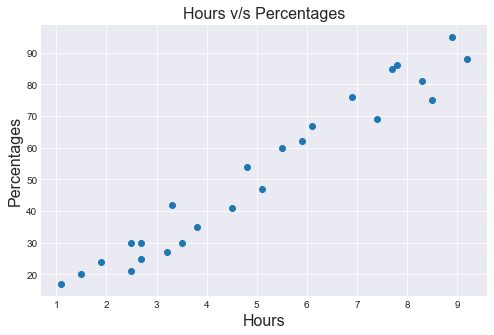

In [13]:
plt.figure(figsize=[8,5])
plt.style.use('seaborn-darkgrid')
plt.scatter(data.Hours,data.Scores)
plt.title('Hours v/s Percentages', fontsize="16")
plt.xlabel('Hours', fontsize="16")
plt.ylabel('Percentages', fontsize="16")
plt.show()

## Statistics of Dataset

In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Splitting the dataset in Training and Testing Dataset

In [16]:
x = data.Hours.values.reshape(-1,1)
y = data.Scores.values

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Model Training (Linear Regression)

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression().fit(x_train, y_train)

### Coefficient and intercept

In [19]:
regression.coef_

array([9.91065648])

In [20]:
regression.intercept_

2.018160041434683

## Visualization of Training Data

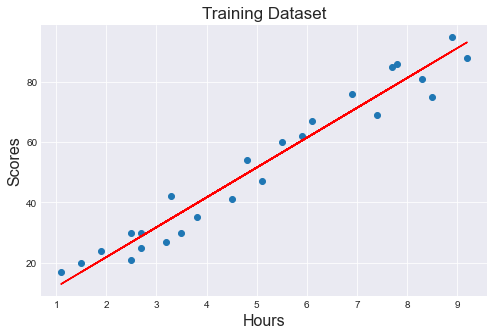

In [27]:
plt.figure(figsize=[8,5])
line = regression.coef_ * x + regression.intercept_

plt.title('Training Dataset',fontsize=17)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Scores',fontsize=16)
plt.scatter(x, y)
plt.plot(x, line, c="r")
plt.show()

## Making Prediction

In [28]:
predicted_y = regression.predict(x_test)

### Comparing Actual Vs Prediction

In [30]:
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_y})  
dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualization

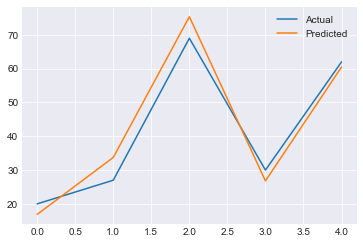

In [33]:
dataframe.plot(kind="line")

### Acuracy

In [37]:
regression.score(x, y)

0.9526947647057274

# Model Evaluation

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predicted_y)) 

Mean Absolute Error: 4.183859899002975


# Predictiong Score of student according to No. of hours he/she studied.

In [42]:
hours = float(input('Enter the no. of hours:'))
own_pred = regression.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no. of hours:9.25
Number of Hours = 9.25
Predicted Score = 93.69173248737538
